# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("Employee_productivity.csv")
df.head(15)

,HoursWorked,FocusScore,ProductivityScore,Department,YearsAtCompany,TeamMeetingsPerWeek,DeskLocation
0,42.4,6.3,3127.96,Engineering,17,0,Open Plan
1,34.0,7.2,4742.60,HR,8,6,Private Office
2,47.2,5.6,2044.73,Sales,15,3,Remote
3,38.4,9.0,5818.92,HR,5,6,Private Office
4,36.4,2.5,1841.31,Sales,9,6,Remote
5,44.4,4.0,2385.25,Sales,20,3,Open Plan
6,44.3,7.1,3888.09,Sales,8,4,Open Plan
7,36.8,5.4,2077.97,Engineering,4,3,Open Plan
8,40.1,4.5,2404.92,Marketing,15,5,Open Plan
9,28.8,2.3,784.88,Engineering,4,3,Private Office


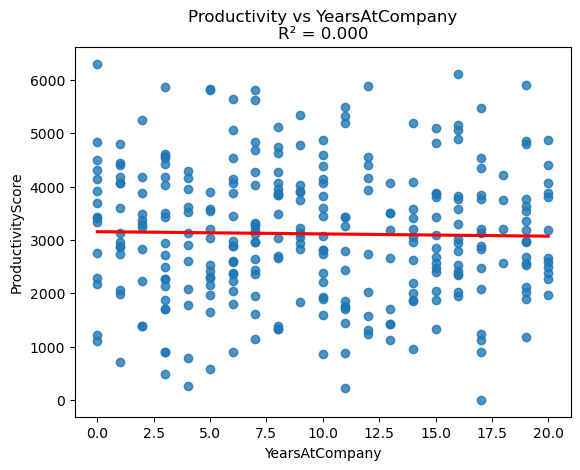

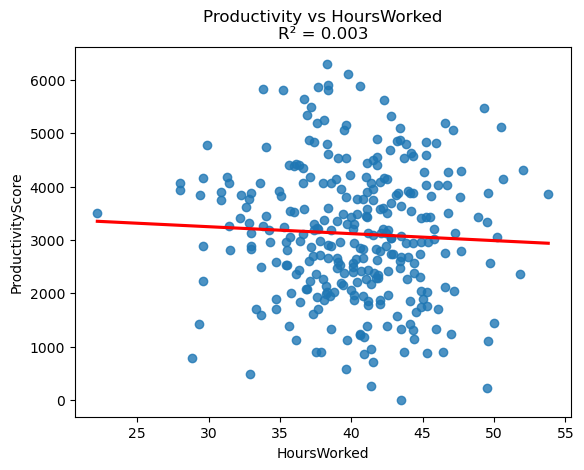

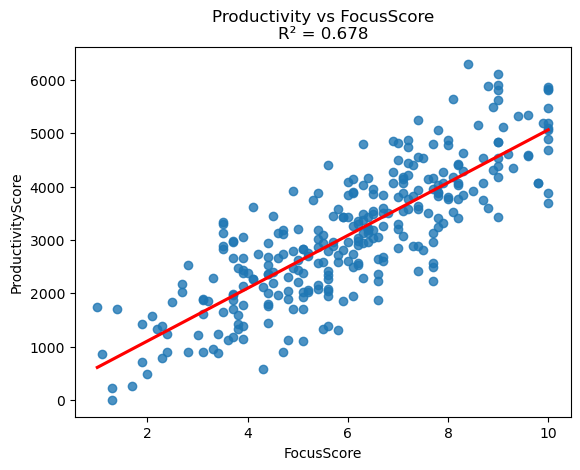

R² Scores:


In [8]:
features = ["YearsAtCompany", "HoursWorked", "FocusScore"]
r2_scores = {}
for f in features:
    X = df[[f]]
    y = df["ProductivityScore"]
    
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2_scores[f] = r2_score(y, y_pred)
    
    sns.regplot(x=f, y="ProductivityScore", data=df, ci=None, line_kws={"color":"red"})
    plt.title(f"Productivity vs {f}\nR² = {r2_scores[f]:.3f}")
    plt.show()

print("R² Scores:")

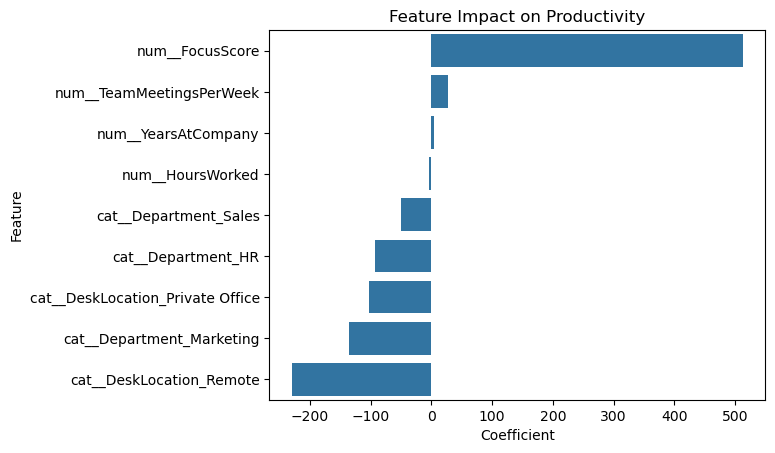

                            Feature  Coefficient
7                   num__FocusScore   512.719278
8          num__TeamMeetingsPerWeek    27.170621
5               num__YearsAtCompany     3.400789
6                  num__HoursWorked    -4.664225
2             cat__Department_Sales   -49.817366
0                cat__Department_HR   -93.398401
3  cat__DeskLocation_Private Office  -103.411959
1         cat__Department_Marketing  -136.240520
4          cat__DeskLocation_Remote  -229.752983


In [26]:
sns.barplot(x="Coefficient", y="Feature", data=importance)
plt.title("Feature Impact on Productivity")
plt.show()

feature_names = model.named_steps["preprocess"].get_feature_names_out()
coefs = model.named_steps["regressor"].coef_

importance = pd.DataFrame({"Feature": feature_names, "Coefficient": coefs})
importance.sort_values(by="Coefficient", ascending=False, inplace=True)

print(importance)

Focus was by far the largest factor on whether or not an employee was able to be productive during any given time. Regardless of time at the company, or what department they were apart of, employees with a high focus score held a significantly better productivity score than their collegues with low focus scores. Another important factor that decided how productive an employee was able to be would be their desk location. Those with an open plan faced significant losses in productivity with a much higher negative impact than workers with more private or quiet office plans.
One recommendation that I would suggest would be try and boost their employees' focus as much as possible. One way to accomplish this would be to allow employees more quiet and private spaces to work. By eliminating open plan office spaces, employees are much more likely to be able to raise their "focus score", which has the highest impact on the productivity of any individual worker. Moreover, while hours worked did have a positive influence on the productivity of their employees, the results were incredibly diminishing, so assigning more hours and/or overtime per week would not lead to sustainably higher levels of productivity, and may actually have the inverse reaction of further lowering the company moral. 